In [68]:
# Titanic EDA and Data Cleaning

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load the dataset
df = pd.read_csv("train.csv")

In [71]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [72]:
# Data Cleaning

In [73]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [74]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Shivali\AppData\Local\Temp\ipykernel_16088\3816650203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Shivali\AppData\Local\Temp\ipykernel_16088\3816650203.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [75]:
# Set seaborn style
sns.set(style="whitegrid")

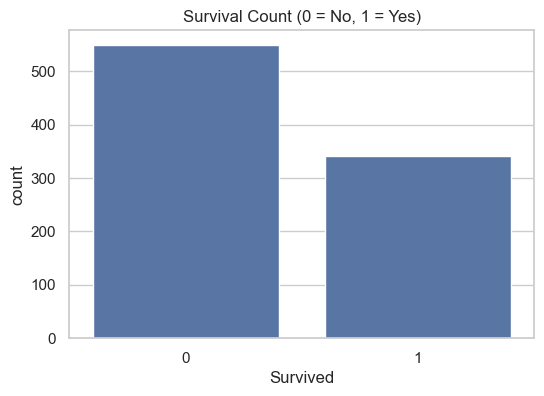

In [76]:
# 1. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

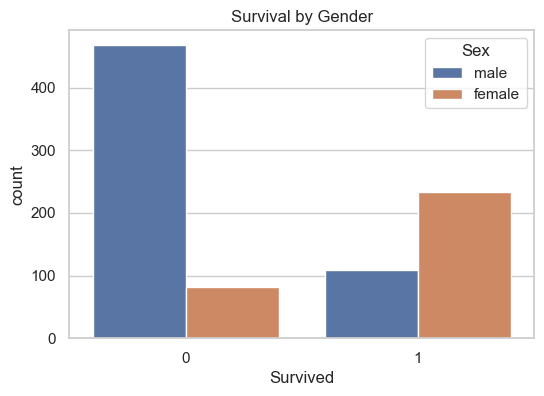

In [77]:
# 2. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

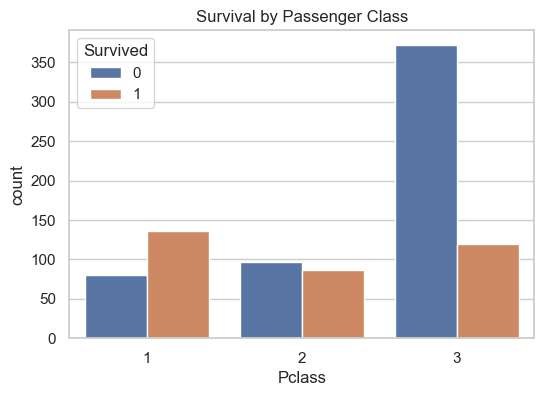

In [78]:
# 3. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

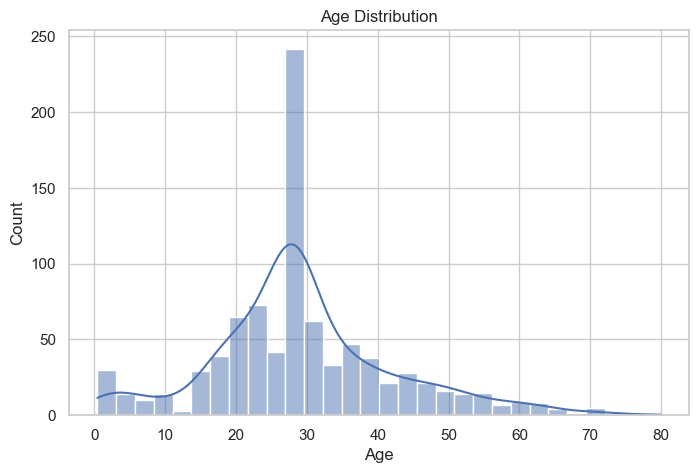

In [79]:
# 4. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

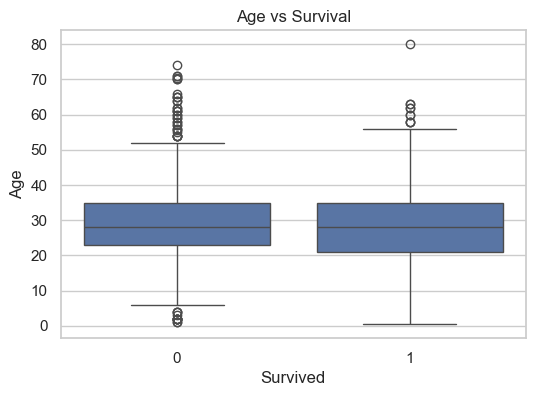

In [80]:
# 5. Age vs Survival Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

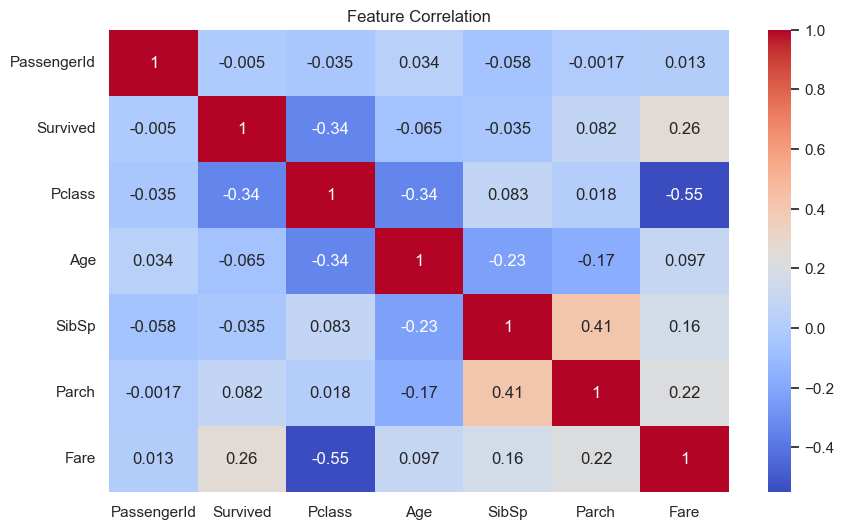

In [81]:
# 6. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [82]:
df.to_csv("cleaned_titanic.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_titanic.csv'")


Cleaned dataset saved as 'cleaned_titanic.csv'
